In [1]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt

## Artificial data

Have some temperature which varies with `depth` and `lon` that decays with a vertical e-folding scale which we call the mixed-layer depth.

In [2]:
lon = xr.DataArray(np.arange(0, 180, 1), dims=("lon", ))
depth = xr.DataArray(np.arange(0, 50, 1), dims=("depth", ))

In [3]:
MLD = xr.DataArray(
    10 + 20 * np.sin(np.deg2rad(lon)),
    dims=("lon", ),
    coords={"lon": lon},
)
MLD

<xarray.DataArray (lon: 180)>
array([10.        , 10.34904813, 10.69798993, 11.04671912, 11.39512947,
       11.74311485, 12.09056927, 12.43738687, 12.78346202, 13.1286893 ,
       13.47296355, 13.81617991, 14.15823382, 14.49902109, 14.83843791,
       15.1763809 , 15.51274712, 15.84743409, 16.18033989, 16.51136309,
       16.84040287, 17.16735899, 17.49213187, 17.81462257, 18.13473286,
       18.45236523, 18.76742294, 19.07980999, 19.38943126, 19.6961924 ,
       20.        , 20.3007615 , 20.59838528, 20.8927807 , 21.18385807,
       21.47152873, 21.75570505, 22.03630046, 22.31322951, 22.58640782,
       22.85575219, 23.12118058, 23.38261213, 23.6399672 , 23.89316741,
       24.14213562, 24.38679601, 24.62707403, 24.86289651, 25.0941916 ,
       25.32088886, 25.54291923, 25.76021507, 25.9727102 , 26.18033989,
       26.38304089, 26.58075145, 26.77341136, 26.96096192, 27.14334601,
       27.32050808, 27.49239414, 27.65895186, 27.82013048, 27.97588093,
       28.12615574, 28.27090915, 28.41009707, 28.54367709, 28.67160853,
       28.79385242, 28.91037151, 29.02113033, 29.12609512, 29.22523392,
       29.31851653, 29.40591453, 29.4874013 , 29.56295201, 29.63254367,
       29.69615506, 29.75376681, 29.80536137, 29.85092303, 29.89043791,
       29.92389396, 29.95128101, 29.9725907 , 29.98781654, 29.9969539 ,
       30.        , 29.9969539 , 29.98781654, 29.9725907 , 29.95128101,
       29.92389396, 29.89043791, 29.85092303, 29.80536137, 29.75376681,
       29.69615506, 29.63254367, 29.56295201, 29.4874013 , 29.40591453,
       29.31851653, 29.22523392, 29.12609512, 29.02113033, 28.91037151,
       28.79385242, 28.67160853, 28.54367709, 28.41009707, 28.27090915,
       28.12615574, 27.97588093, 27.82013048, 27.65895186, 27.49239414,
       27.32050808, 27.14334601, 26.96096192, 26.77341136, 26.58075145,
       26.38304089, 26.18033989, 25.9727102 , 25.76021507, 25.54291923,
       25.32088886, 25.0941916 , 24.86289651, 24.62707403, 24.38679601,
       24.14213562, 23.89316741, 23.6399672 , 23.38261213, 23.12118058,
       22.85575219, 22.58640782, 22.31322951, 22.03630046, 21.75570505,
       21.47152873, 21.18385807, 20.8927807 , 20.59838528, 20.3007615 ,
       20.        , 19.6961924 , 19.38943126, 19.07980999, 18.76742294,
       18.45236523, 18.13473286, 17.81462257, 17.49213187, 17.16735899,
       16.84040287, 16.51136309, 16.18033989, 15.84743409, 15.51274712,
       15.1763809 , 14.83843791, 14.49902109, 14.15823382, 13.81617991,
       13.47296355, 13.1286893 , 12.78346202, 12.43738687, 12.09056927,
       11.74311485, 11.39512947, 11.04671912, 10.69798993, 10.34904813])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179

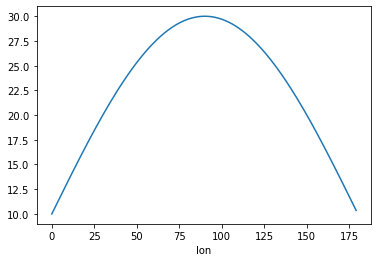

In [4]:
MLD.plot()

In [5]:
T_surf = 20.0
noise_level = 0.1  # max. noise in K

T = xr.DataArray(
    (
        T_surf  # surface temperature
        * xr.ufuncs.exp(- depth / MLD)  # decay to 1/e at MLD
    ),
    coords={"lon": lon, "depth": depth},
)

# let noise decay with depth
T = T + T / T_surf * noise_level * np.random.normal(size=T.shape)

T

<xarray.DataArray (depth: 50, lon: 180)>
array([[19.83570304, 20.01484484, 19.85733417, ..., 19.84648057,
        19.97949157, 19.90715943],
       [17.93924917, 18.23951452, 18.29346586, ..., 18.01594984,
        18.26192804, 18.13132478],
       [16.41634036, 16.45962589, 16.5397597 , ..., 16.79862876,
        16.52774013, 16.48939662],
       ...,
       [ 0.18236607,  0.21381095,  0.24897341, ...,  0.28385181,
         0.24576318,  0.21249409],
       [ 0.16496819,  0.19430836,  0.22408807, ...,  0.2611738 ,
         0.22387094,  0.19366677],
       [ 0.14930265,  0.17638572,  0.20563016, ...,  0.23784621,
         0.20565922,  0.17688329]])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
  * depth    (depth) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49

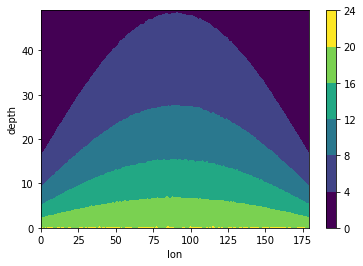

In [6]:
T.plot.contourf()

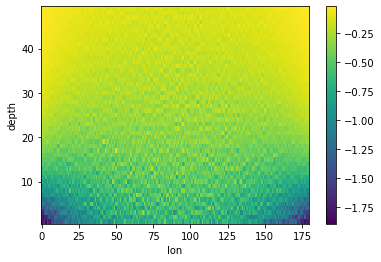

In [7]:
T.diff("depth").plot()

(Note that the following fails if there are places where T is non-monotonic.)

## Diagnose the exaxt MLD temp

We'll define the MLD base temp as surface temperature divided by e.

In [8]:
mld_temp = T.isel(depth=0) / np.exp(1)
mld_temp

<xarray.DataArray (lon: 180)>
array([7.29714735, 7.36304993, 7.305105  , 7.37780578, 7.31938695,
       7.40699481, 7.41778187, 7.38526292, 7.36679983, 7.27766411,
       7.34096406, 7.34630852, 7.40824803, 7.32140403, 7.40416688,
       7.37313884, 7.2805195 , 7.31999955, 7.32858467, 7.38947633,
       7.35332895, 7.2846546 , 7.33965841, 7.35227202, 7.35813803,
       7.34620454, 7.37083817, 7.39525451, 7.33332576, 7.31699647,
       7.39644792, 7.34936443, 7.36502331, 7.38596074, 7.40405362,
       7.38315257, 7.36968178, 7.32913805, 7.3139185 , 7.43948691,
       7.29136313, 7.35341943, 7.37850437, 7.3351708 , 7.36912369,
       7.38744399, 7.40032373, 7.35743962, 7.41235099, 7.32242123,
       7.40891292, 7.37930284, 7.39798528, 7.34618921, 7.3646932 ,
       7.33553351, 7.30366649, 7.37459273, 7.35493243, 7.36433065,
       7.37922357, 7.34144033, 7.35114157, 7.35199485, 7.3251466 ,
       7.36014367, 7.37122449, 7.41209305, 7.39205366, 7.40916557,
       7.35912826, 7.37837713, 7.3554758 , 7.36179638, 7.38168284,
       7.36287785, 7.30688309, 7.42655765, 7.35967575, 7.29447396,
       7.32607355, 7.34206935, 7.32136751, 7.25332956, 7.40008962,
       7.40469336, 7.38454283, 7.37854733, 7.38100176, 7.33009272,
       7.31638711, 7.34678421, 7.29788103, 7.32979902, 7.32184711,
       7.41674315, 7.34666756, 7.3187338 , 7.32176349, 7.35422317,
       7.41792775, 7.33752293, 7.37809476, 7.35753126, 7.39902643,
       7.35073456, 7.38547076, 7.4096942 , 7.32816635, 7.33499539,
       7.34669129, 7.37460891, 7.32003874, 7.40243126, 7.31212532,
       7.42871967, 7.37979878, 7.31356304, 7.3428083 , 7.37676549,
       7.35076591, 7.37735172, 7.3091976 , 7.33358045, 7.32860779,
       7.31664684, 7.39181374, 7.37211389, 7.30965309, 7.36526417,
       7.36912101, 7.33060855, 7.33965829, 7.36988295, 7.37221588,
       7.3177748 , 7.39321619, 7.37020791, 7.38862332, 7.31069375,
       7.35726486, 7.39844249, 7.37983516, 7.3879826 , 7.35436677,
       7.3711229 , 7.32054413, 7.28252724, 7.35883036, 7.37923316,
       7.4204698 , 7.39810797, 7.35840064, 7.34806695, 7.44031944,
       7.40771735, 7.40626384, 7.35906229, 7.35977027, 7.38515111,
       7.36137067, 7.36310582, 7.39262527, 7.40619322, 7.34533733,
       7.33954848, 7.40206033, 7.33808724, 7.31690809, 7.34339634,
       7.33544688, 7.27891017, 7.39333978, 7.38932135, 7.36318617,
       7.38255052, 7.39786742, 7.30111218, 7.3500442 , 7.32343468])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
    depth    int64 0

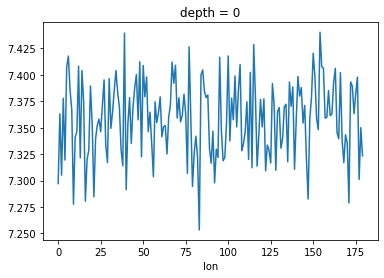

In [9]:
mld_temp.plot();

## Diagnose nearest grid box to MLD base

In [10]:
T_mld_nearest = T.isel(depth=abs(T - mld_temp).argmin("depth"))
T_mld_nearest

<xarray.DataArray (lon: 180)>
array([7.3854061 , 7.59538136, 7.11751389, 7.44114601, 7.55480993,
       7.18790227, 7.39923408, 7.67701769, 7.25714638, 7.43532806,
       7.08556724, 7.29270731, 7.45348958, 7.0874358 , 7.21216956,
       7.44612684, 7.10635261, 7.35390539, 7.42726884, 7.59714197,
       7.27502409, 7.44381333, 7.12920576, 7.27376756, 7.3849943 ,
       7.12160765, 7.2461414 , 7.42929679, 7.4780599 , 7.26032166,
       7.39641198, 7.46291027, 7.18766308, 7.31065383, 7.4093958 ,
       7.22755802, 7.29921439, 7.38504191, 7.47545745, 7.55524977,
       7.31540786, 7.41322899, 7.43396492, 7.25124576, 7.33259777,
       7.40668933, 7.4543107 , 7.25150843, 7.3961487 , 7.39283301,
       7.54782451, 7.49636741, 7.2944864 , 7.34256877, 7.41715436,
       7.43620783, 7.28035431, 7.33451623, 7.33239481, 7.41294309,
       7.41221339, 7.1914587 , 7.27192144, 7.26968101, 7.37671402,
       7.43445908, 7.40389225, 7.37963535, 7.49925577, 7.33740873,
       7.33264092, 7.38440037, 7.33772122, 7.42561589, 7.45435888,
       7.50801327, 7.20241111, 7.46562807, 7.247584  , 7.27885348,
       7.3037114 , 7.26094659, 7.27445137, 7.29107066, 7.36491977,
       7.42644987, 7.34255062, 7.37900592, 7.38178655, 7.39947342,
       7.36802459, 7.34689409, 7.29332153, 7.33914197, 7.34428059,
       7.35026232, 7.32965959, 7.28461656, 7.29983065, 7.27912832,
       7.35263012, 7.24222921, 7.45213833, 7.25033499, 7.47677687,
       7.41504344, 7.4208753 , 7.34730138, 7.36471375, 7.36527868,
       7.29547787, 7.45730162, 7.26441384, 7.46080433, 7.45568778,
       7.31765163, 7.37308011, 7.30129635, 7.25152863, 7.48155077,
       7.39524166, 7.39365116, 7.3625721 , 7.32308606, 7.32728667,
       7.25360385, 7.4888441 , 7.35819412, 7.27053636, 7.44755346,
       7.38218436, 7.44339178, 7.27510155, 7.19607586, 7.4669614 ,
       7.42122003, 7.2861176 , 7.26440717, 7.496201  , 7.37595563,
       7.31601643, 7.53666203, 7.50374086, 7.38426018, 7.26712003,
       7.50245269, 7.41073447, 7.33375775, 7.23893934, 7.5179846 ,
       7.38635959, 7.2821114 , 7.48382016, 7.37657792, 7.29685181,
       7.51019745, 7.38904113, 7.28228282, 7.15684993, 7.36647892,
       7.34962147, 7.53508731, 7.36378802, 7.25402206, 7.14199606,
       7.48439731, 7.29721696, 7.10612769, 7.40568925, 7.29008654,
       7.06034293, 7.43930033, 7.15477561, 7.58949533, 7.49940077,
       7.19404273, 7.54865443, 7.39880169, 7.09890209, 7.58464796])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
    depth    (lon) int64 10 10 11 11 11 12 12 12 13 ... 13 12 12 12 11 11 11 10

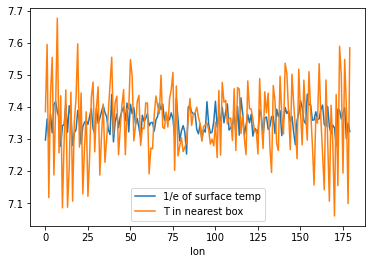

In [11]:
mld_temp.plot(label="1/e of surface temp")
T_mld_nearest.plot(label="T in nearest box")
plt.gca().legend();

## Interpolate to depth of exact ML base temp

We'll diagnose the hottest of from all boxes in the water column that are colder (ie below) than the ML base. We'll also find the next hotter box and linearly interpolate between them.

(Note that here, we're assuming that at least at the ML base, T decreases with increasing depth.)

In [12]:
mld_box_colder = (T > mld_temp).sum("depth")
mld_box_hotter = mld_box_colder - 1

In [13]:
T_colder = T.isel(depth=mld_box_colder)
T_hotter = T.isel(depth=mld_box_hotter)

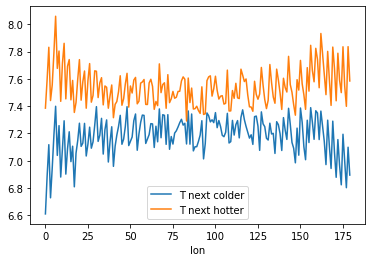

In [14]:
T_colder.plot(label="T next colder")
T_hotter.plot(label="T next hotter")
plt.gca().legend();

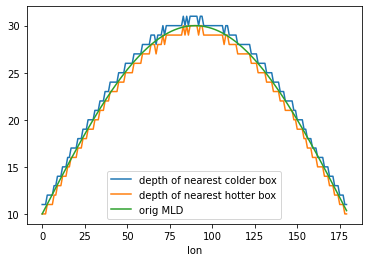

In [15]:
T_colder.coords["depth"].plot(label="depth of nearest colder box")
T_hotter.coords["depth"].plot(label="depth of nearest hotter box")
MLD.plot(label="orig MLD")
plt.gca().legend();

In [16]:
depth = T.coords["depth"]
mld_interpolated = (
    depth.isel(depth=mld_box_colder) 
    + (
        (depth.isel(depth=mld_box_hotter) - depth.isel(depth=mld_box_colder))
        / (T_hotter - T_colder)
        * (mld_temp - T_colder)
    )
)
mld_interpolated
         

<xarray.DataArray (lon: 180)>
array([10.11379656, 10.32737464, 10.73736465, 11.08881103, 11.3860202 ,
       11.63801588, 11.97190227, 12.45723847, 12.79958093, 13.28395877,
       13.59290757, 13.90565441, 14.08197935, 14.61322204, 14.63739472,
       15.1611773 , 15.63897934, 16.06216852, 16.26534048, 16.46204536,
       16.83205104, 17.46967803, 17.53237094, 17.79552297, 18.07663021,
       18.51737766, 18.73245251, 19.1008595 , 19.42593898, 19.85787604,
       19.99986146, 20.35353959, 20.53652745, 20.74742215, 21.01480634,
       21.51486042, 21.70521657, 22.14163574, 22.47999254, 22.3778133 ,
       23.06739149, 23.19518954, 23.22554862, 23.67043634, 23.87417166,
       24.06722974, 24.18226355, 24.65966715, 24.9337873 , 25.24974952,
       25.34165827, 25.36275947, 25.65185171, 25.98650075, 26.15408708,
       26.41823205, 26.91918746, 26.83496146, 26.91434805, 27.16974008,
       27.12973832, 27.60392179, 27.7564344 , 27.70070346, 28.18441369,
       28.40928136, 28.12317493, 27.90177118, 28.32393281, 28.67526807,
       28.88906944, 29.02277385, 28.93945215, 29.18668174, 29.26221637,
       29.37603694, 29.59126286, 29.15873593, 29.56955857, 29.93219043,
       29.92045136, 29.77074496, 29.85466251, 30.22421241, 29.85425315,
       30.07127906, 29.77900516, 30.00149343, 30.00281221, 30.23371766,
       30.2280051 , 30.00069157, 29.98164439, 30.0286833 , 30.10238283,
       29.71908854, 29.94033803, 29.89902236, 29.87381328, 29.69850974,
       29.75528396, 29.65199678, 29.46992477, 29.51878276, 29.26762295,
       29.26912545, 29.16647098, 28.8032136 , 29.15577951, 29.13434793,
       28.7661862 , 28.30712617, 28.81659824, 28.35037857, 28.49786254,
       27.68585144, 27.97357536, 27.95605673, 27.7375891 , 27.38365719,
       27.19378185, 27.0801143 , 27.21972141, 26.95954677, 26.99167524,
       26.68025131, 26.23499491, 25.95726085, 25.8622955 , 25.41546479,
       25.06011553, 25.38657943, 24.84996195, 24.53765055, 24.35565879,
       24.28119305, 23.72211459, 23.67746542, 23.36094712, 23.21682463,
       22.85705508, 22.44328144, 22.35639034, 21.99022772, 21.70033392,
       21.35679506, 21.28240718, 21.14668139, 20.66255477, 20.29057537,
       19.90231675, 19.58919448, 19.32922055, 19.07720297, 18.62789507,
       18.27188771, 17.96232479, 17.79719266, 17.51887194, 16.95919366,
       16.97018345, 16.45257638, 15.94933253, 15.71087853, 15.58704358,
       15.28235643, 14.79217818, 14.52492165, 14.19193709, 13.90185556,
       13.55388482, 13.28586285, 12.6232925 , 12.32047402, 12.20144421,
       11.70612467, 11.2716613 , 11.16370303, 10.6594484 , 10.37848702])
Coordinates:
    depth    (lon) int64 11 11 11 12 12 12 12 13 13 ... 13 13 13 12 12 12 11 11
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179

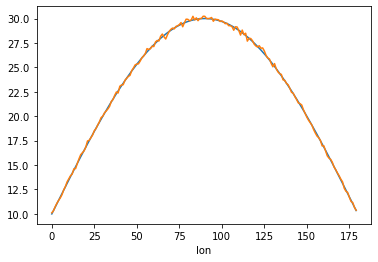

In [17]:
MLD.plot()
mld_interpolated.plot();

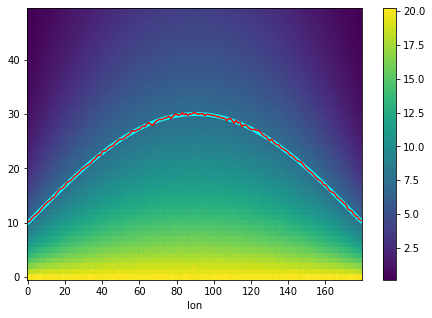

In [18]:
T.plot(size=5)
MLD.plot(color="cyan", linewidth=4)
mld_interpolated.plot(color="red");

In [19]:
(T.interp(depth=mld_interpolated) - mld_temp).std()

<xarray.DataArray ()>
array(4.89742587e-16)